# K-means

> * K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. ... In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible
> * It is __unsupervised__ because the points have __no__ external classification.

### When to use ?
> The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

### Advantages of k-means
> * Guarantees convergence. 
> * Can warm-start the positions of centroids. 
> * Easily adapts to new examples. 
> * Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.iloc[:,[3,4]].values

## Elbow Method

In [4]:
from sklearn.cluster import KMeans

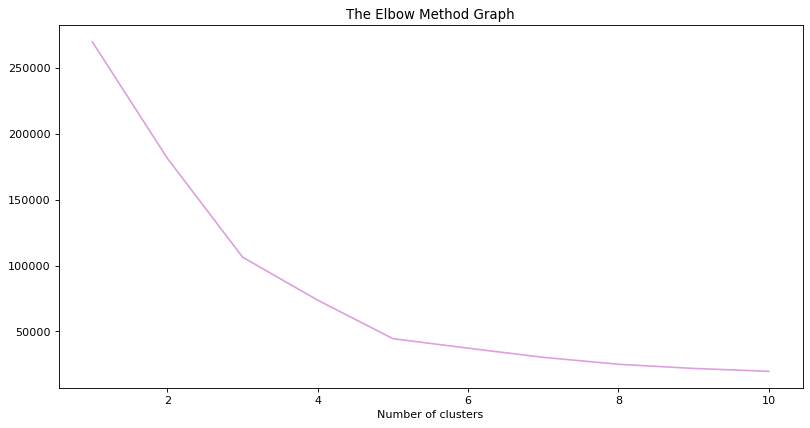

In [5]:
iner = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300,  n_init = 10, random_state = 0)
    kmeans.fit(X)
    iner.append(kmeans.inertia_)

plt.figure(figsize = (12,6), dpi = 80)
plt.plot(range(1,11), iner, color = 'plum')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.show()

> * Elbow Method for K means 
> * Import ElbowVisualizer
> * Visualizing to get optimul no of cluster.

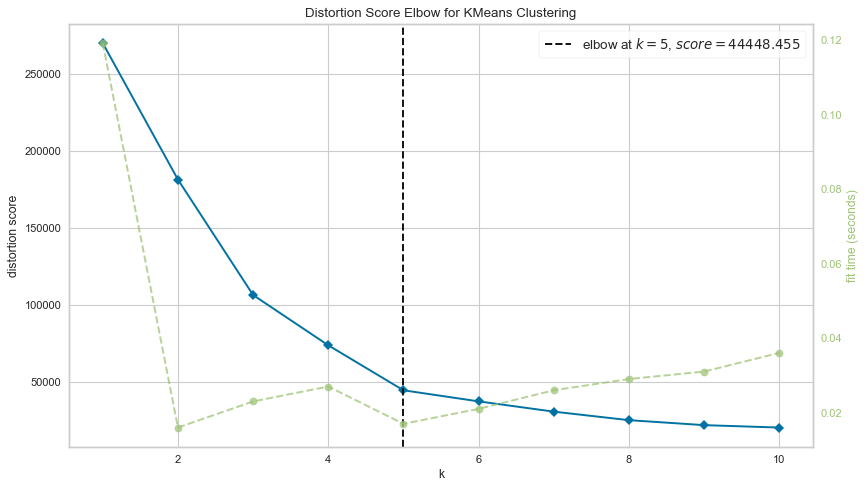

In [6]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

plt.figure(figsize = (12,7), dpi = 80)
#k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure
plt.show()

> ### Here we got the exact value of k i.e 5

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

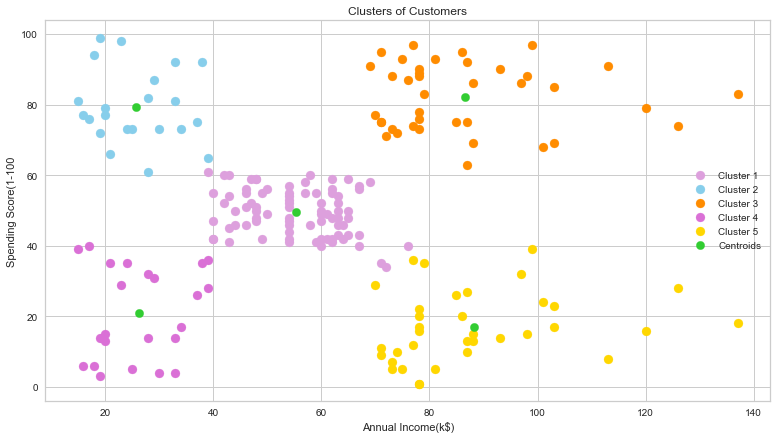

In [8]:
plt.figure(figsize = (13,7))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=80, c='plum', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=80, c='skyblue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=80, c='darkorange', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=80, c='orchid', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=80, c='gold', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c='limegreen', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()